In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('equity_curve_SOL.csv')
df['Time'] = pd.to_datetime(df['Time'])
df.tail()

,Capital,Time
138,99375.450533,2025-06-26 17:30:00+03:00
139,98375.450533,2025-06-26 23:30:00+03:00
140,97375.450533,2025-06-27 08:00:00+03:00
141,96375.450533,2025-06-27 23:45:00+03:00
142,100375.450533,2025-06-28 20:45:00+03:00


In [ ]:
df['tp/sl'] = df['Capital'] - df['Capital'].shift(1)

In [ ]:
df.loc[df.index==0, 'tp/sl'] = df['Capital']- 100000

In [ ]:
df['tp/sl'].sum()

np.float64(375.45053280681896)

In [ ]:
df.head()

,Capital,Time,tp/sl
0,102000.0,2024-12-03 16:45:00+03:00,2000.0
1,101000.0,2024-12-05 15:45:00+03:00,-1000.0
2,100000.0,2024-12-07 04:15:00+03:00,-1000.0
3,102000.0,2024-12-09 10:00:00+03:00,2000.0
4,101000.0,2024-12-09 10:45:00+03:00,-1000.0


In [ ]:
coins = ['BTC','ETH','SOL','BNB','XRP','PEPE','DOGE','SUI','OP','ARB']
dfs = {coin: pd.read_csv(f"dc_equity_curve_{coin}.csv") for coin in coins}

initial_capital = 100000  # Başlangıç sermayesi

for coin, df in dfs.items():
    # 'tp/sl' sütununu hesapla
    df['tp/sl'] = df['Capital'] - df['Capital'].shift(1)

    # İlk satırı düzelt (Capital - initial_capital)
    df.loc[df.index == 0, 'tp/sl'] = df['Capital'].iloc[0] - initial_capital

    # Coin adını ekle (birleştirme için)
    df['coin'] = coin # Hangi coin'e ait olduğunu belirtmek için

# Tüm DataFrame'leri birleştir
combined_df = pd.concat(dfs.values(), ignore_index=True)

combined_df = combined_df.sort_values('Time')
combined_df['Time'] = pd.to_datetime(combined_df['Time'])
combined_df['Capital'] = combined_df['tp/sl'].cumsum()

In [ ]:
combined_df['tp/sl'].sum() / 1000

np.float64(198.0195981567719)

In [ ]:
combined_df.resample('M', on='Time')['tp/sl'].sum() / 1000

/tmp/ipython-input-155-3931899807.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  combined_df.resample('M', on='Time')['tp/sl'].sum() / 1000


,tp/sl
Time,
2024-12-31 00:00:00+03:00,20.901233
2025-01-31 00:00:00+03:00,19.049360
2025-02-28 00:00:00+03:00,57.634186
2025-03-31 00:00:00+03:00,5.585301
2025-04-30 00:00:00+03:00,36.488116
2025-05-31 00:00:00+03:00,35.377949
2025-06-30 00:00:00+03:00,22.983454


In [ ]:
combined_df.resample('M', on='Time')['tp/sl'].count()

/tmp/ipython-input-156-2738141151.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  combined_df.resample('M', on='Time')['tp/sl'].count()


,tp/sl
Time,
2024-12-31 00:00:00+03:00,140
2025-01-31 00:00:00+03:00,155
2025-02-28 00:00:00+03:00,154
2025-03-31 00:00:00+03:00,197
2025-04-30 00:00:00+03:00,161
2025-05-31 00:00:00+03:00,201
2025-06-30 00:00:00+03:00,136


In [ ]:
combined_df.count()

,0
Capital,1144
Time,1144
tp/sl,1144
coin,1144


In [ ]:
dfs['OP'].count()

,0
Capital,132
Time,132
tp/sl,132
coin,132


In [ ]:
dfs = {coin: pd.read_csv(f"equity_curve_{coin}.csv") for coin in coins}

initial_capital = 100000  # Başlangıç sermayesi

for coin, df in dfs.items():
    # 'tp/sl' sütununu hesapla
    df['tp/sl'] = df['Capital'] - df['Capital'].shift(1)

    # İlk satırı düzelt (Capital - initial_capital)
    df.loc[df.index == 0, 'tp/sl'] = df['Capital'].iloc[0] - initial_capital

    # Coin adını ekle (birleştirme için)
    df['coin'] = coin # Hangi coin'e ait olduğunu belirtmek için

# Tüm DataFrame'leri birleştir
combined_df2 = pd.concat(dfs.values(), ignore_index=True)

combined_df2 = combined_df2.sort_values('Time')
combined_df2['Time'] = pd.to_datetime(combined_df2['Time'])
combined_df2['Capital'] = combined_df2['tp/sl'].cumsum()

In [ ]:
combined_df2['tp/sl'].sum() / 1000

np.float64(212.68899607221974)

In [ ]:
# BB
combined_df2.resample('M', on='Time')['tp/sl'].sum() / 1000

/tmp/ipython-input-161-3460264720.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  combined_df2.resample('M', on='Time')['tp/sl'].sum() / 1000


,tp/sl
Time,
2024-12-31 00:00:00+03:00,-6.199723
2025-01-31 00:00:00+03:00,1.366044
2025-02-28 00:00:00+03:00,31.053455
2025-03-31 00:00:00+03:00,-4.849746
2025-04-30 00:00:00+03:00,47.014530
2025-05-31 00:00:00+03:00,79.967039
2025-06-30 00:00:00+03:00,65.337397
2025-07-31 00:00:00+03:00,-1.000000


In [ ]:
combined_df2.resample('M', on='Time')['tp/sl'].count()

/tmp/ipython-input-162-2072216340.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  combined_df2.resample('M', on='Time')['tp/sl'].count()


,tp/sl
Time,
2024-12-31 00:00:00+03:00,164
2025-01-31 00:00:00+03:00,190
2025-02-28 00:00:00+03:00,171
2025-03-31 00:00:00+03:00,224
2025-04-30 00:00:00+03:00,194
2025-05-31 00:00:00+03:00,249
2025-06-30 00:00:00+03:00,167
2025-07-31 00:00:00+03:00,1


In [ ]:
combined_df2.count()

,0
Capital,1360
Time,1360
tp/sl,1360
coin,1360


In [ ]:
dfs['OP'].count(), dfs['XRP'].count()

(Capital    148
 Time       148
 tp/sl      148
 coin       148
 dtype: int64,
 Capital    134
 Time       134
 tp/sl      134
 coin       134
 dtype: int64)

In [ ]:
dfs['SUI'].count(),dfs['BNB'].count()

(Capital    138
 Time       138
 tp/sl      138
 coin       138
 dtype: int64,
 Capital    132
 Time       132
 tp/sl      132
 coin       132
 dtype: int64)

In [ ]:
dfs['OP']['tp/sl'].mean()

np.float64(-51.98956284040213)

In [ ]:
dfs['OP']['tp/sl'].count()

np.int64(148)

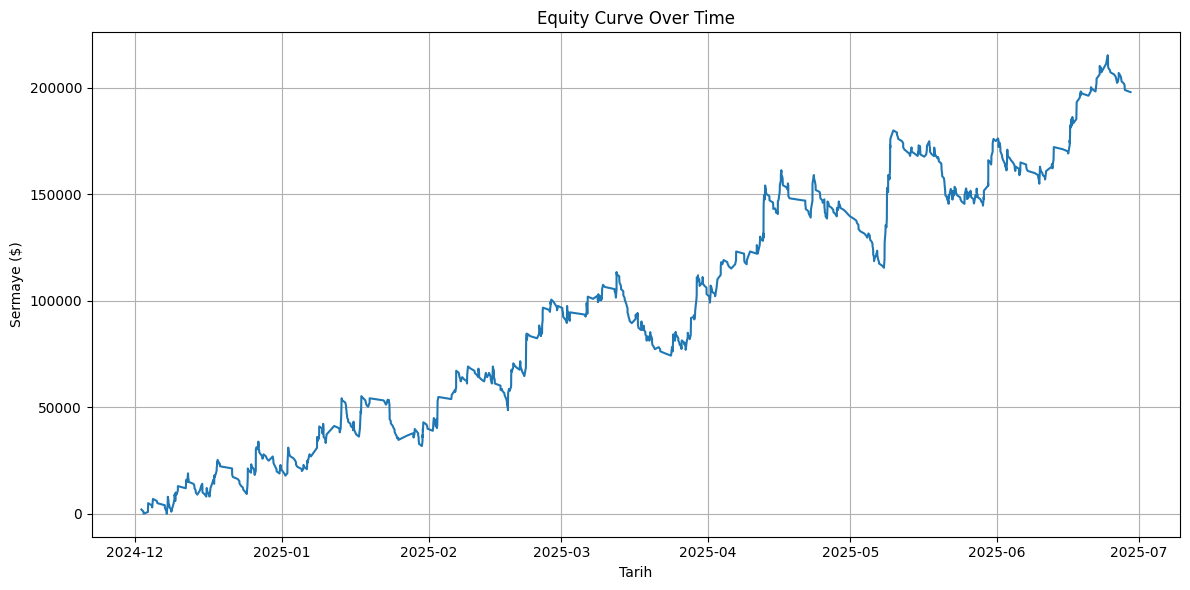

In [ ]:
# DC
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(combined_df['Time']), combined_df['Capital'])
plt.title("Equity Curve Over Time")
plt.xlabel("Tarih")
plt.ylabel("Sermaye ($)")

# Y eksenini 10,000'er artacak şekilde ayarla
min_capital = int(combined_df['Capital'].min())
max_capital = int(combined_df['Capital'].max())
plt.yticks(range(min_capital - min_capital % 10000, max_capital + 10000, 10000))

plt.grid(True)
plt.tight_layout()
plt.show()

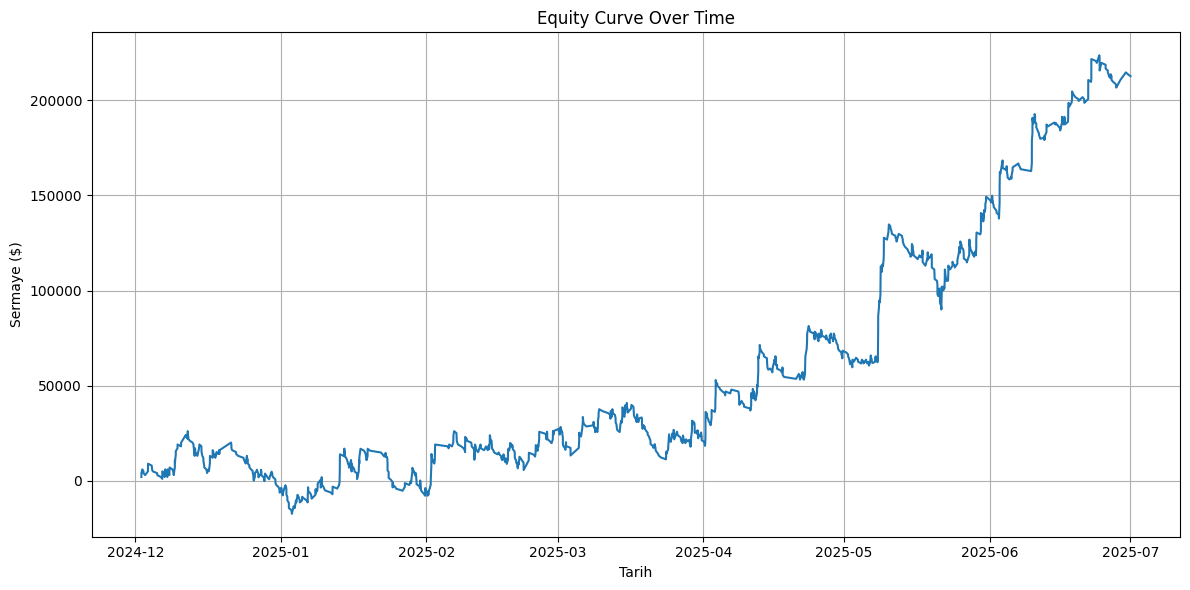

In [ ]:
# BB
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(combined_df2['Time']), combined_df2['Capital'])
plt.title("Equity Curve Over Time")
plt.xlabel("Tarih")
plt.ylabel("Sermaye ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
combined_df_total = pd.concat([combined_df, combined_df2])

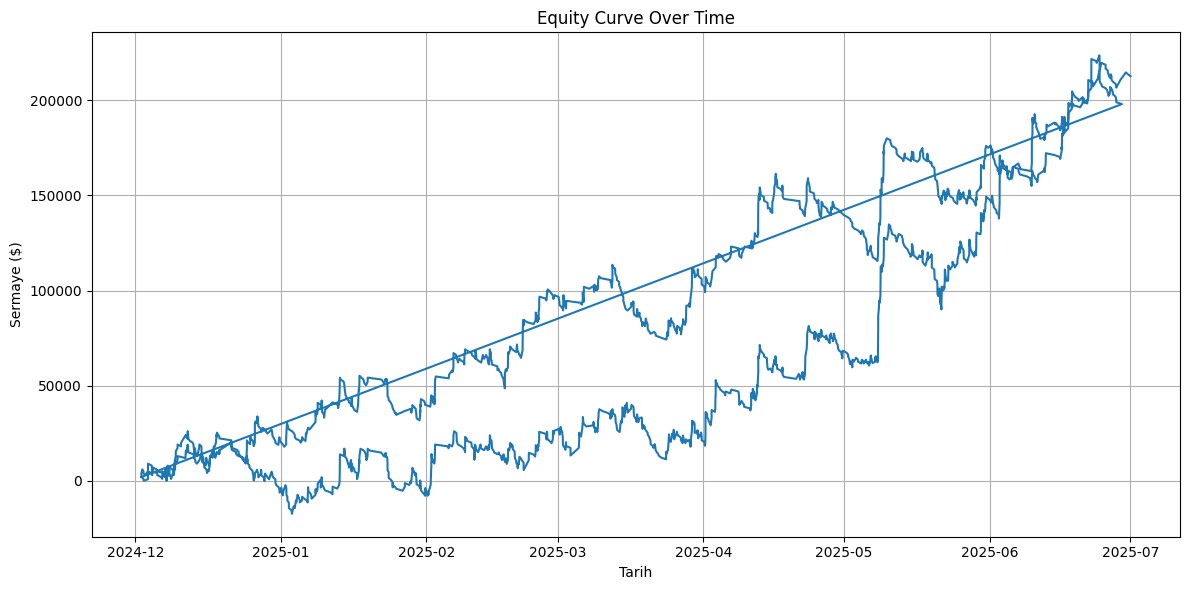

In [ ]:
# Üstte DC Altta BB
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(combined_df_total['Time']), combined_df_total['Capital'])
plt.title("Equity Curve Over Time")
plt.xlabel("Tarih")
plt.ylabel("Sermaye ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
combined_df_total = combined_df_total.sort_values('Time')

In [ ]:
combined_df_total['Capital'] = combined_df_total['tp/sl'].cumsum()

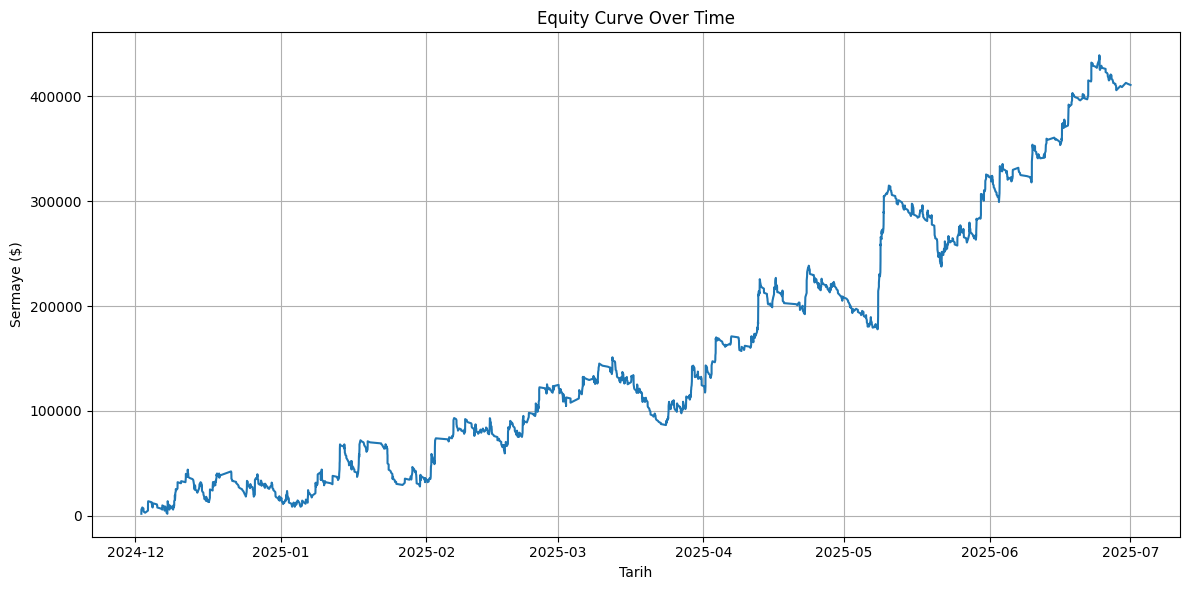

In [ ]:
# Üstte DC Altta BB
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(combined_df_total['Time']), combined_df_total['Capital'])
plt.title("Equity Curve Over Time")
plt.xlabel("Tarih")
plt.ylabel("Sermaye ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
combined_df_total[combined_df_total['Time']>= '2025-04-17']

,Capital,Time,tp/sl,coin
283,212296.760519,2025-04-17 11:45:00+03:00,-1000.000000,SOL
340,211296.760519,2025-04-17 11:45:00+03:00,-1000.000000,SOL
1024,210296.760519,2025-04-17 18:15:00+03:00,-1000.000000,SUI
1098,209296.760519,2025-04-17 18:15:00+03:00,-1000.000000,ARB
603,212105.393635,2025-04-17 20:00:00+03:00,2808.633116,PEPE
...,...,...,...,...
392,409708.594229,2025-06-28 20:45:00+03:00,4000.000000,SOL
1143,408708.594229,2025-06-29 04:45:00+03:00,-1000.000000,ARB
1220,412708.594229,2025-06-30 00:45:00+03:00,4000.000000,OP
1221,411708.594229,2025-06-30 11:30:00+03:00,-1000.000000,OP


In [ ]:
# Örnek olarak: Time sıralı bir dataframe
combined_df_total = combined_df_total.sort_values('Time').reset_index(drop=True)

# En yüksek zirve ve bu zirveden itibaren yaşanan düşüşler
combined_df_total['Peak'] = combined_df_total['Capital'].cummax()
combined_df_total['Drawdown'] = (combined_df_total['Capital'] - combined_df_total['Peak'])

# En büyük düşüşleri (negatif fark) bul
top_drawdowns = combined_df_total.sort_values('Drawdown').head(5)

print(top_drawdowns[['Time', 'Capital', 'Peak', 'Drawdown']])


                          Time        Capital           Peak      Drawdown
2034 2025-05-21 17:30:00+03:00  237628.728812  314820.429884 -77191.701072
2033 2025-05-21 17:30:00+03:00  238628.728812  314820.429884 -76191.701072
2037 2025-05-21 18:30:00+03:00  239628.728812  314820.429884 -75191.701072
2032 2025-05-21 15:30:00+03:00  239628.728812  314820.429884 -75191.701072
2031 2025-05-21 12:00:00+03:00  240628.728812  314820.429884 -74191.701072
